In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import functions as fc

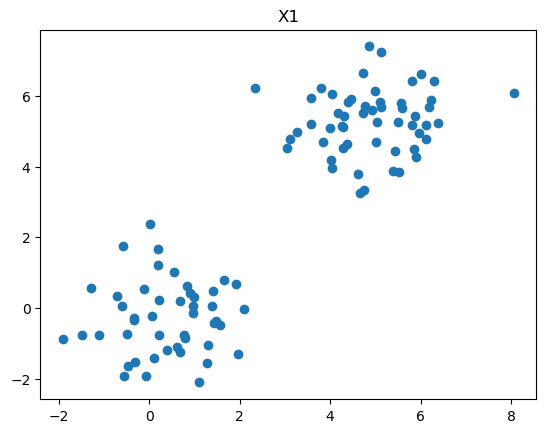

In [115]:
n = 100
d = 2

Mu = [np.zeros(2), 5*np.ones(2)]
Sigma = [np.identity(2), np.identity(2)]
p = [1/2, 1/2]

X1 =fc.mixt_gauss(Mu, Sigma, n, p)
plt.scatter(X1[:, 0], X1[:, 1])
plt.title("X1")
plt.show()

In [116]:
sigma =5
k = lambda x,y : fc.k_gauss(x,y,sigma)
dk = lambda x,y : fc.dk_gauss(x,y,sigma)
ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

In [118]:
import functions as fc
V = []
XX = [X1]
K = 200
tau = 0.01
lambd = 0.001
X = X1
#fig, axs = plt.subplots(nrows=2*K//100, ncols=5, figsize=(40, 15))

for l in range(K):
    t = l * tau
    eps = np.random.randn(n, d)
    psi = fc.psi(X1, eps, t)
    sigma_t = np.sqrt(fc.sigma_2(t)) + 1e-7
    Z = np.exp(-t) * X1+ sigma_t**2 * eps
    # if l%10 == 0:
    #     ll = l//10
    #     ax = axs[ll//5, ll%5]
    #     #ax.scatter(X[:, 0], X[:, 1],color = "green")
    #     ax.scatter(Z[:, 0], Z[:, 1],color = "blue")
    #     ax.set_title(f'l={l}')
    #     #ax.axis('off')
    #     ax.set_aspect('equal')
    Xi = fc.Xi(Z, eps, k, dk, ddk, t)
    #print(np.mean(Xi))
    phi = np.linalg.inv(1/n * Xi + lambd * np.identity(n)) @ psi
    eps_expanded = lambda m: np.repeat(eps[:, np.newaxis, :], m, axis=1)
    term = lambda x: k(Z, x)[:, :, None] * eps_expanded(len(x)) / sigma_t + dk(Z, x)
    term_transposed = lambda x: np.transpose(term(x), (1, 0, 2))  # Transpose to get (m, n, d)
    v = lambda x: np.einsum('i,jik->jk', phi, term_transposed(x))
    V.append(v)
    X = X + tau * v(X)
    XX.append(X)
#plot OU
#plot norme de v

plt.show()

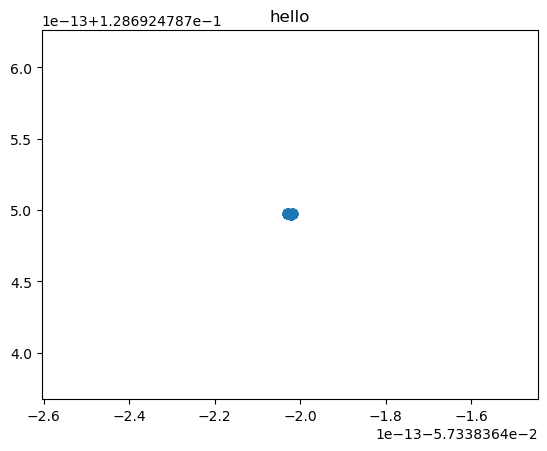

In [89]:
m = 100
Y = scs.multivariate_normal.rvs(np.zeros(d),np.identity(d),m)

for i in range(K):
    Y = Y - tau * V[K-1-i](Y)

plt.scatter(Y[:,0], Y[:,1])
plt.title("hello")
plt.show()


In [107]:
fc.fonction()

AttributeError: module 'functions' has no attribute 'fonction'